# 1. Load the data:

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
file_path = '/Users/hilmanyusoh/Desktop/Restaurant_Forecasting/Balaji_Fast_Food_Sales.csv'
 
data = pd.read_csv(file_path)

In [80]:
print(data.head())

   order_id        date        item_name  item_type  item_price  quantity  \
0         1  07-03-2022         Aalopuri   Fastfood          20        13   
1         2   8/23/2022          Vadapav   Fastfood          20        15   
2         3  11/20/2022          Vadapav   Fastfood          20         1   
3         4  02-03-2023  Sugarcane juice  Beverages          25         6   
4         5  10-02-2022  Sugarcane juice  Beverages          25         8   

   transaction_amount transaction_type received_by time_of_sale  
0                 260              NaN         Mr.        Night  
1                 300             Cash         Mr.    Afternoon  
2                  20             Cash         Mr.    Afternoon  
3                 150           Online         Mr.        Night  
4                 200           Online         Mr.      Evening  


In [90]:
data.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


# 2. Removing rows with missing values (NaN) from the dataset

In [81]:
data_cleaned = data.dropna()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 893 entries, 1 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            893 non-null    int64 
 1   date                893 non-null    object
 2   item_name           893 non-null    object
 3   item_type           893 non-null    object
 4   item_price          893 non-null    int64 
 5   quantity            893 non-null    int64 
 6   transaction_amount  893 non-null    int64 
 7   transaction_type    893 non-null    object
 8   received_by         893 non-null    object
 9   time_of_sale        893 non-null    object
dtypes: int64(4), object(6)
memory usage: 76.7+ KB


In [82]:
data_cleaned.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening


# 3. Categorizing sales into daytime and nighttime

In [83]:
daytime = ['Morning', 'Afternoon', 'Evening']
nighttime = ['Night']

data['sales_by_time'] = data['time_of_sale'].apply(lambda x: 'Daytime' if x in daytime else 'Nighttime')

In [84]:
daytime_hours = ['Morning', 'Afternoon']
nighttime_hours = ['Evening', 'Night']

data['day_or_night'] = data['time_of_sale'].apply(lambda x: 'Daytime' if x in daytime_hours else 'Nighttime')

sales_by_time = data.groupby(['day_or_night', 'time_of_sale'])['order_id'].count()

sales_by_time.head()



day_or_night  time_of_sale
Daytime       Afternoon       205
              Morning         190
Nighttime     Evening         201
              Midnight        199
              Night           205
Name: order_id, dtype: int64

# 4. Group by time and items:

In [85]:
item_sales = data.groupby(['sales_by_time', 'item_name', 'item_type']).agg({
    'quantity': 'sum',      
    'item_price': 'max'     
}).sort_values(['sales_by_time', 'quantity'], ascending=[True, False])

print(item_sales.head(20)) 


                                         quantity  item_price
sales_by_time item_name       item_type                      
Daytime       Cold coffee     Beverages       859          40
              Sugarcane juice Beverages       814          25
              Panipuri        Fastfood        704          20
              Frankie         Fastfood        682          50
              Sandwich        Fastfood        604          60
              Vadapav         Fastfood        588          20
              Aalopuri        Fastfood        577          20
Nighttime     Panipuri        Fastfood        522          20
              Cold coffee     Beverages       502          40
              Sandwich        Fastfood        493          60
              Frankie         Fastfood        468          50
              Aalopuri        Fastfood        467          20
              Sugarcane juice Beverages       464          25
              Vadapav         Fastfood        418          20


## 5. Visualize the data (Optional):
  * 5.1 Total Sales Distribution by Time of Sale
  * 5.2 Daytime: Menu vs Beverages
  * 5.3 Nighttime: Menu vs Beverages

5.1 Total Sales Distribution by Time of Sale

/var/folders/by/j89gc0qj6_zfzkf42sg0dr1c0000gp/T/ipykernel_25993/3505240901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['day_or_night'] = data_cleaned['time_of_sale'].apply(lambda x: 'Daytime' if x in daytime else 'Nighttime')


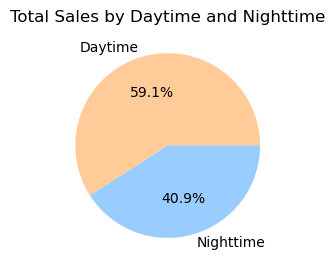

In [86]:
daytime_hours = ['Daytime', 'Nighttime']
data_cleaned['day_or_night'] = data_cleaned['time_of_sale'].apply(lambda x: 'Daytime' if x in daytime else 'Nighttime')

day_night_sales = data_cleaned.groupby('day_or_night')['quantity'].sum()

plt.figure(figsize=(3, 3))
plt.pie(day_night_sales, labels=day_night_sales.index, autopct='%1.1f%%', colors=['#ffcc99', '#99ccff'])
plt.title('Total Sales by Daytime and Nighttime')
plt.show()




5.2 Daytime: Menu vs Beverages

/var/folders/by/j89gc0qj6_zfzkf42sg0dr1c0000gp/T/ipykernel_25993/2803105933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['day_or_night'] = data_cleaned['time_of_sale'].apply(lambda x: 'Daytime' if x in daytime_hours else 'Nighttime')


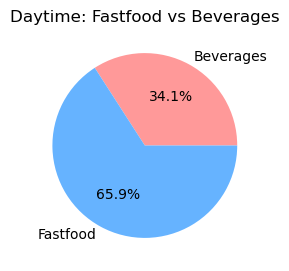

In [87]:
daytime_hours = ['Morning', 'Afternoon']
data_cleaned['day_or_night'] = data_cleaned['time_of_sale'].apply(lambda x: 'Daytime' if x in daytime_hours else 'Nighttime')

daytime_sales = data_cleaned[data_cleaned['day_or_night'] == 'Daytime']
daytime_menu_vs_beverages = daytime_sales.groupby('item_type')['quantity'].sum()

plt.figure(figsize=(3, 3))
plt.pie(daytime_menu_vs_beverages, labels=daytime_menu_vs_beverages.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Daytime: Fastfood vs Beverages')
plt.show()

5.3 Nighttime: Menu vs Beverages

/var/folders/by/j89gc0qj6_zfzkf42sg0dr1c0000gp/T/ipykernel_25993/1513033202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['day_or_night'] = data_cleaned['time_of_sale'].apply(lambda x: 'Nighttime' if x in nighttime_hours else 'Daytime')


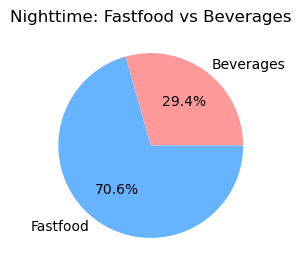

In [88]:
nighttime_hours = ['Evening', 'Midnight','Night']
data_cleaned['day_or_night'] = data_cleaned['time_of_sale'].apply(lambda x: 'Nighttime' if x in nighttime_hours else 'Daytime')
nighttime_sales = data_cleaned[data_cleaned['day_or_night'] == 'Nighttime']

nighttime_menu_vs_beverages = nighttime_sales.groupby('item_type')['quantity'].sum()

plt.figure(figsize=(3, 3))
plt.pie(nighttime_menu_vs_beverages, labels=nighttime_menu_vs_beverages.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Nighttime: Fastfood vs Beverages')
plt.show()



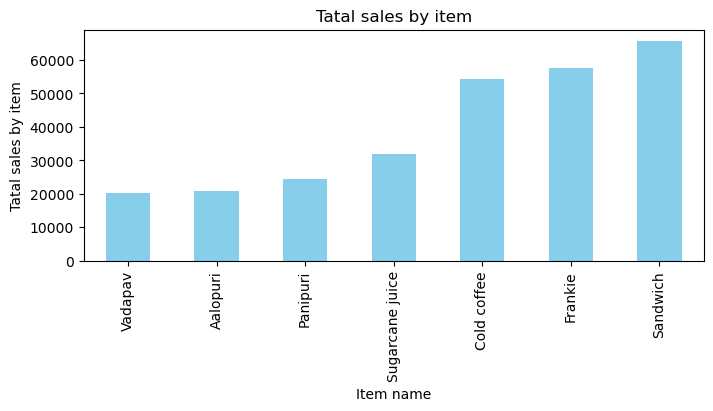

In [95]:
total_sales_by_item = data.groupby('item_name')['transaction_amount'].sum().sort_values()

plt.figure(figsize= (8 ,3))
total_sales_by_item.plot(kind='bar', color='skyblue')
plt.title('Tatal sales by item')
plt.xlabel('Item name')
plt.ylabel('Tatal sales by item')
plt.show()